# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares
       If it set further lows, buy some more
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    
    (Scaling in and out)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 4

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [7]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail(100)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
326,2015-07-23,210.18,2015-08-10,210.57,0.39,9.75,25,11759.80
327,2015-07-24,208.00,2015-08-17,210.59,2.59,67.34,26,11827.14
328,2015-07-27,206.79,2015-09-15,198.46,-8.33,-216.58,26,11610.56
329,2015-08-06,208.35,2015-09-16,200.18,-8.17,-220.59,27,11389.97
330,2015-08-19,208.32,2015-10-02,195.00,-13.32,-333.00,25,11056.97
331,2015-11-11,207.74,2015-11-18,208.73,0.99,24.75,25,11081.72
332,2015-12-02,208.53,2015-12-16,208.03,-0.50,-12.50,25,11069.22
333,2016-03-24,203.12,2016-03-29,205.12,2.00,50.00,25,11119.22
334,2016-04-07,203.95,2016-04-13,208.00,4.05,101.25,25,11220.47
335,2016-04-28,207.45,2016-05-10,208.45,1.00,25.00,25,11245.47


In [9]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-12-13,25290.43,25290.43,25290.43,0,25290.43,-
2019-12-16,25290.43,25290.43,25290.43,0,25290.43,-
2019-12-17,25290.43,25290.43,25290.43,0,25290.43,-
2019-12-18,25290.43,25290.43,25290.43,0,25290.43,-
2019-12-19,25290.43,25290.43,25290.43,0,25290.43,-


Generate strategy stats - display all available stats

In [10]:
pf.print_full(stats)

start                                                    2000-01-03
end                                                      2019-12-19
beginning_balance                                             10000
ending_balance                                             25290.43
total_net_profit                                           15290.43
gross_profit                                               24510.09
gross_loss                                                 -9219.65
profit_factor                                                  2.66
return_on_initial_capital                                    152.90
annual_return_rate                                             4.76
trading_period                           19 years 11 months 16 days
pct_time_in_market                                            40.01
total_num_trades                                                426
trades_per_year                                               21.34
num_winning_trades                              

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2000-01-03 00:00:00 BUY  68 SPY @ 145.44
2019-12-19 00:00:00 SELL 68 SPY @ 320.90


Plot Equity Curves: Strategy vs Benchmark

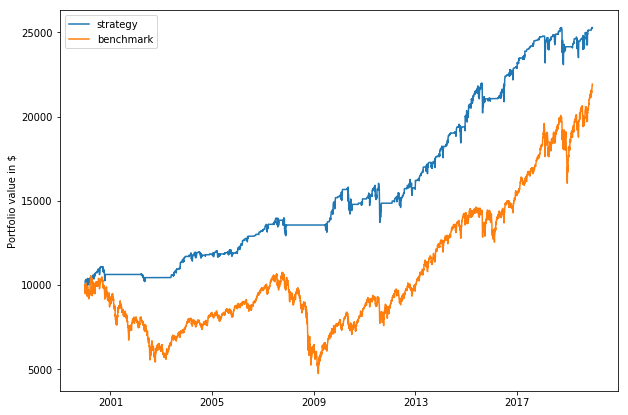

In [12]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

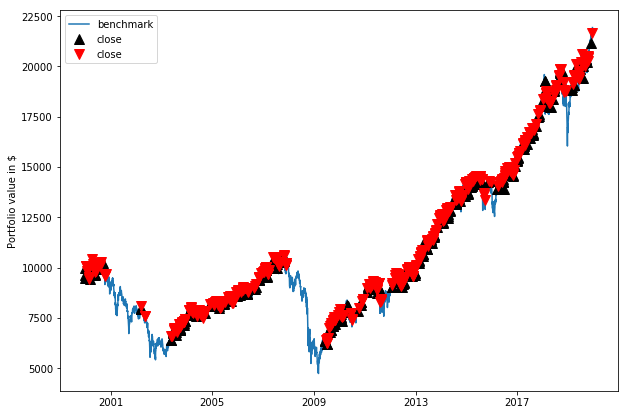

In [13]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,4.76,4.01
max_closed_out_drawdown,-14.37,-55.89
drawdown_annualized_return,-3.02,-13.93
drawdown_recovery,-0.05,-1.42
best_month,8.19,22.21
worst_month,-12.59,-29.43
sharpe_ratio,0.63,0.30
sortino_ratio,0.48,0.39
monthly_std,1.56,4.39


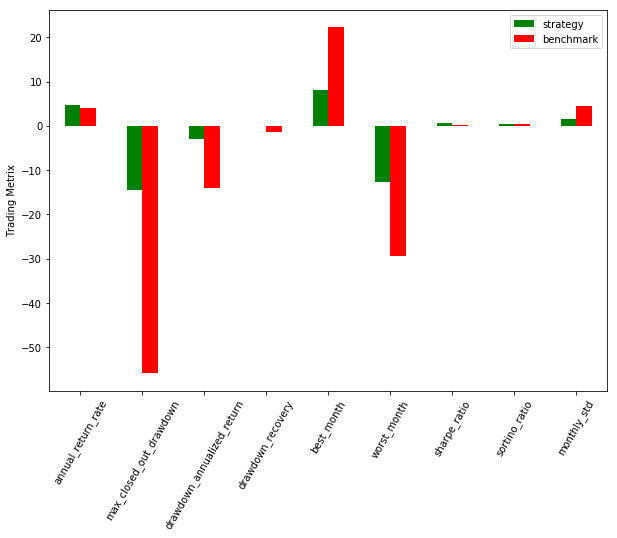

In [14]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df